In [69]:
import pandas as pd
from scipy import stats
import numpy as np

In [31]:
df = pd.read_csv(r"data/train.csv")


In [32]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

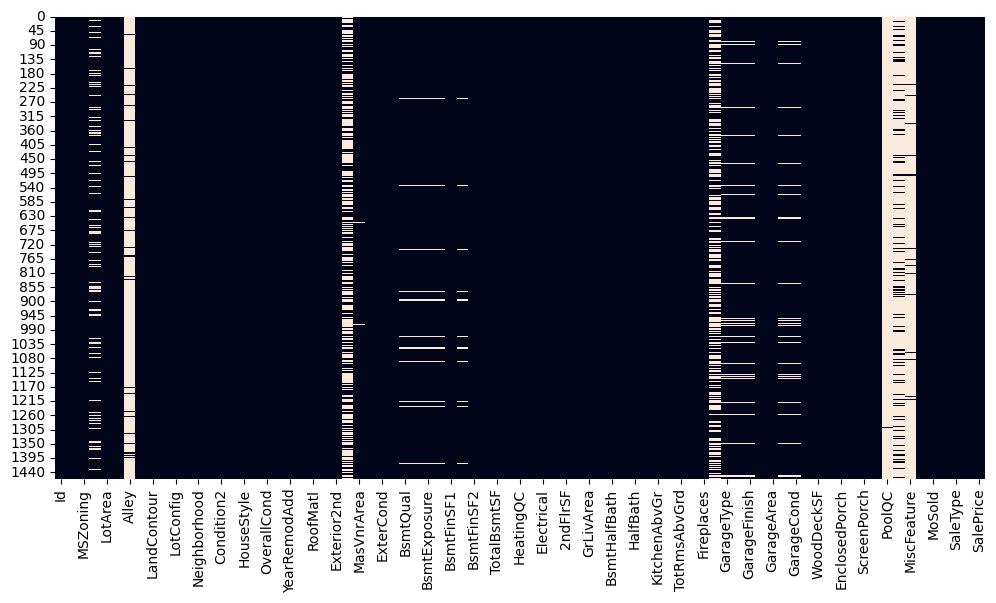

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()


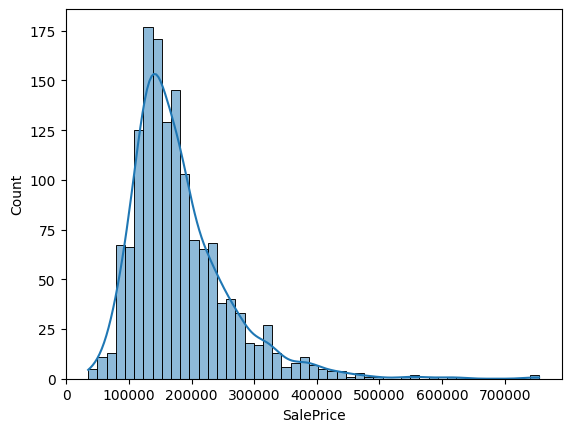

In [34]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()


In [35]:
# Example ordinal mappings
ordinal_mappings = {
    'ExterQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'FireplaceQu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'PoolQC': {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    'BsmtExposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
    'GarageFinish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
}
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping).fillna(0)

categorical_cols = df.select_dtypes(include=['object']).columns
df_numeric = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



/var/folders/40/h3m4kk3n3kx9r7bn1_4_nwmm0000gn/T/ipykernel_2614/1740531206.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")


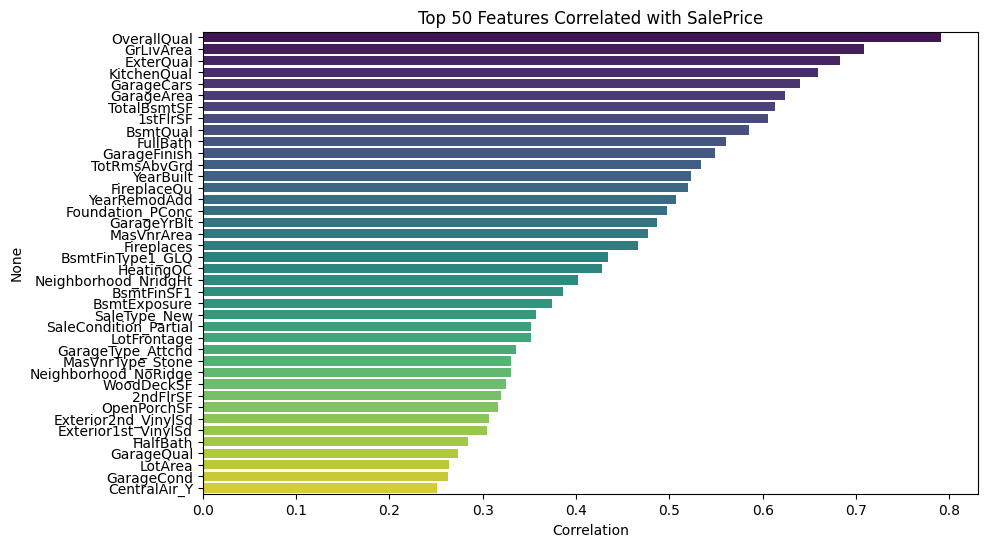

In [36]:
# Compute correlation with SalePrice
corr = df_numeric.corr()['SalePrice'].sort_values(ascending=False)

# Take top 20 most correlated features (excluding SalePrice itself)
top_corr_features = corr.drop('SalePrice').head(40)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")
plt.title("Top 50 Features Correlated with SalePrice")
plt.xlabel("Correlation")
plt.show()


In [57]:
# 1. Make a copy to avoid overwriting original
df_encoded = df.copy()

# 2. One-hot encode categorical variables
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# 3. Now check correlations
corr = df_encoded.corr()



# 4. Select top correlated features with SalePrice
top_corr_features = corr['SalePrice'][corr['SalePrice'].abs() >= 0.3]

# 5. Filter only those columns
selected_features = list(top_corr_features.index)
if "SalePrice" not in selected_features:
    selected_features.append("SalePrice")

df_selected = df_encoded[selected_features]

df_selected.head()



# Let's say your correlation Series is called top_corr_features
selected_features = list(top_corr_features.index)  # get the feature names
selected_features.append("SalePrice")  # make sure SalePrice stays in

df_selected = df_encoded[selected_features]



df_selected

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,...,Exterior2nd_VinylSd,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,BsmtFinType1_GLQ,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleCondition_Partial,SalePrice
0,65.0,7,2003,2003,196.0,4,4.0,1.0,706,856,...,True,False,False,True,True,True,False,False,False,208500
1,80.0,6,1976,1976,0.0,3,4.0,4.0,978,1262,...,False,False,True,False,False,True,False,False,False,181500
2,68.0,7,2001,2002,162.0,4,4.0,2.0,486,920,...,True,False,False,True,True,True,False,False,False,223500
3,60.0,7,1915,1970,0.0,3,3.0,1.0,216,756,...,False,False,False,False,False,False,True,False,False,140000
4,84.0,8,2000,2000,350.0,4,4.0,3.0,655,1145,...,True,False,False,True,True,True,False,False,False,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,0.0,3,4.0,1.0,0,953,...,True,False,False,True,False,True,False,False,False,175000
1456,85.0,6,1978,1988,119.0,3,4.0,1.0,790,1542,...,False,True,True,False,False,True,False,False,False,210000
1457,66.0,7,1941,2006,0.0,5,3.0,1.0,275,1152,...,False,False,False,False,True,True,False,False,False,266500
1458,68.0,5,1950,1996,0.0,3,3.0,2.0,49,1078,...,False,False,True,False,True,True,False,False,False,142125


In [64]:
df_selected.isnull().sum().sort_values(ascending=False).head(10)


LotFrontage             0
Exterior2nd_VinylSd     0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
SalePrice               0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Exterior1st_VinylSd     0
MasVnrType_Stone        0
dtype: int64

In [63]:
df_selected["LotFrontage"].fillna(df_encoded["LotFrontage"].median(), inplace=True)


df_selected["GarageYrBlt"].fillna(0, inplace=True)

df_selected["MasVnrArea"].fillna(0, inplace=True)



/var/folders/40/h3m4kk3n3kx9r7bn1_4_nwmm0000gn/T/ipykernel_2614/4147132359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["LotFrontage"].fillna(df_encoded["LotFrontage"].median(), inplace=True)
/var/folders/40/h3m4kk3n3kx9r7bn1_4_nwmm0000gn/T/ipykernel_2614/4147132359.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["GarageYrBlt"].fillna(0, inplace=True)
/var/folders/40/h3m4kk3n3kx9r7bn1_4_nwmm0000gn/T/ipykernel_2614/4147132359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

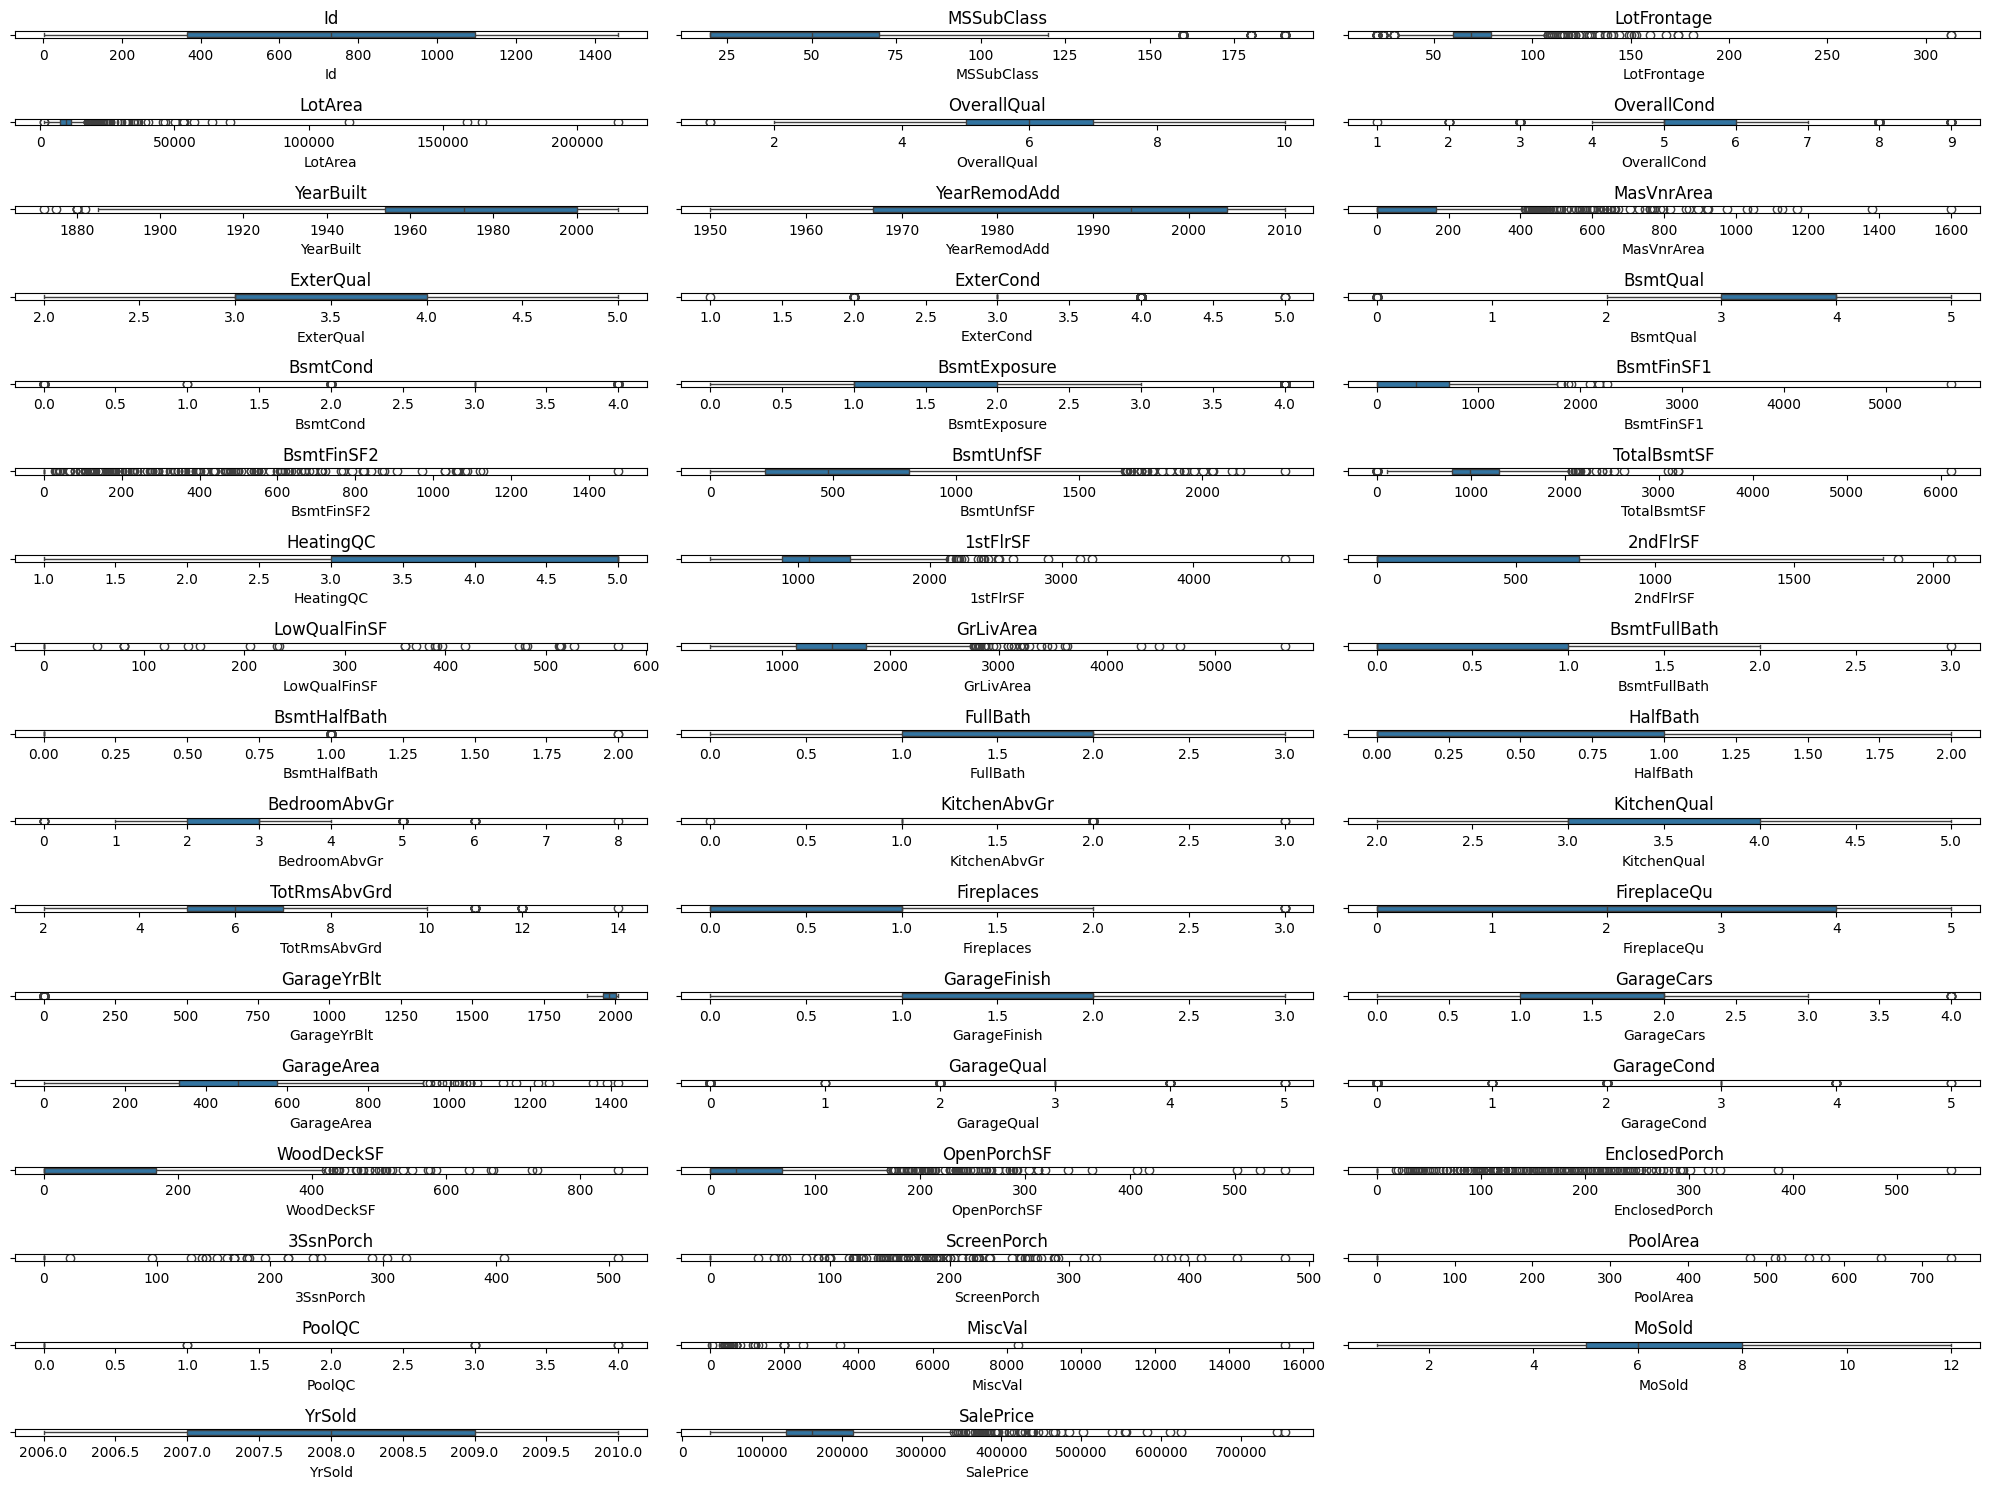

In [73]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df_encoded[col])
    plt.title(col)

plt.tight_layout()
plt.show()


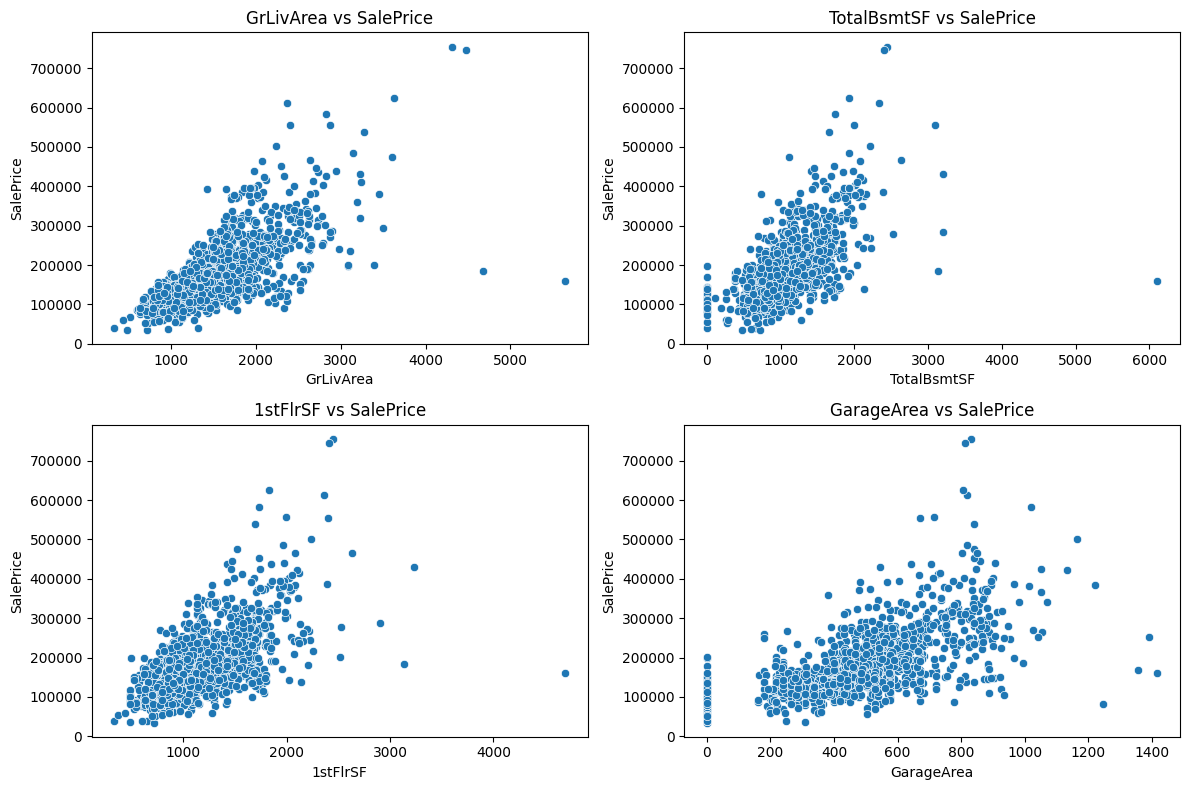

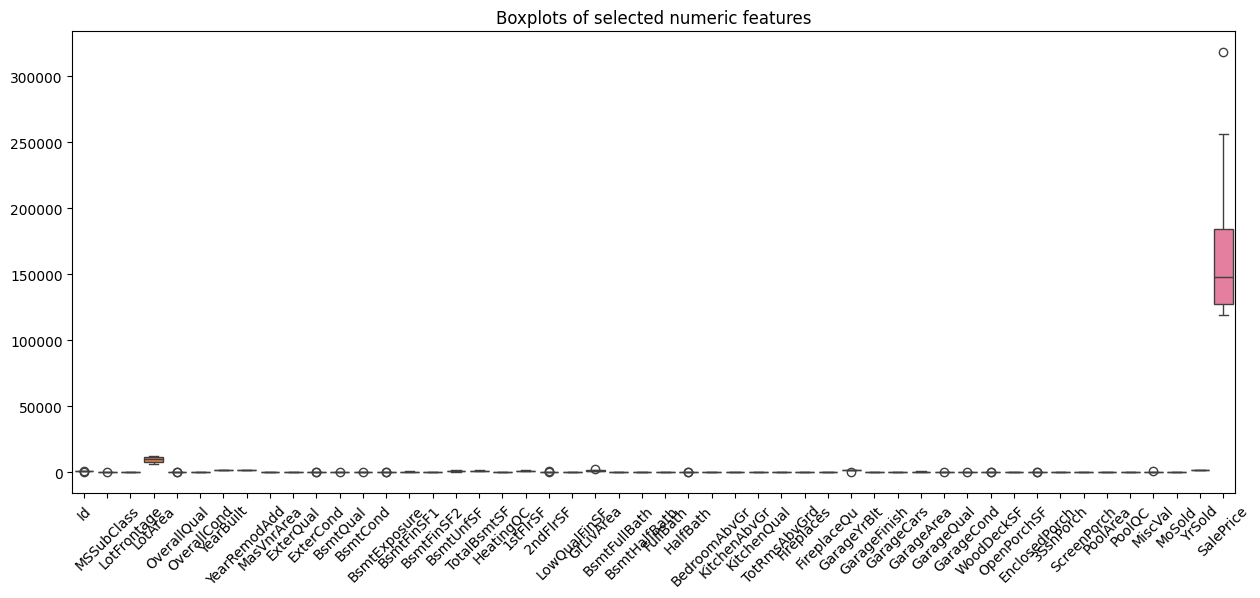

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for a few important numeric features vs SalePrice
important_features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df_encoded, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.show()

# Boxplots for numeric columns to see distribution & outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_encoded[numeric_cols].sample(10))  # show only 10 numeric cols for readability
plt.xticks(rotation=45)
plt.title('Boxplots of selected numeric features')
plt.show()


In [80]:
outlier_index = df_encoded['GrLivArea'].idxmax()
outlier_index


1298

In [87]:
print(df_encoded.loc[1298].T)

Id                        1299
MSSubClass                  60
LotFrontage              313.0
LotArea                  63887
OverallQual                 10
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial     True
Name: 1298, Length: 219, dtype: object


In [88]:
df_encoded = df_encoded.drop(index=1298)
df_encoded = df_encoded.reset_index(drop=True)



In [89]:
# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# 2️⃣ Prepare data
X = df_selected.drop("SalePrice", axis=1)  # Features
y = df_selected["SalePrice"]               # Target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Initialize XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 4️⃣ Train model
xgb_model.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_set=[(X_test, y_test)],
    verbose=50
)

# 5️⃣ Predict and evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse:.2f}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:84456.78155
[50]	validation_0-rmse:29840.99722
[100]	validation_0-rmse:26568.87127
[150]	validation_0-rmse:26287.51260
[200]	validation_0-rmse:26190.70123
[248]	validation_0-rmse:26213.11247
RMSE on test set: 26172.22


<Figure size 1000x800 with 0 Axes>

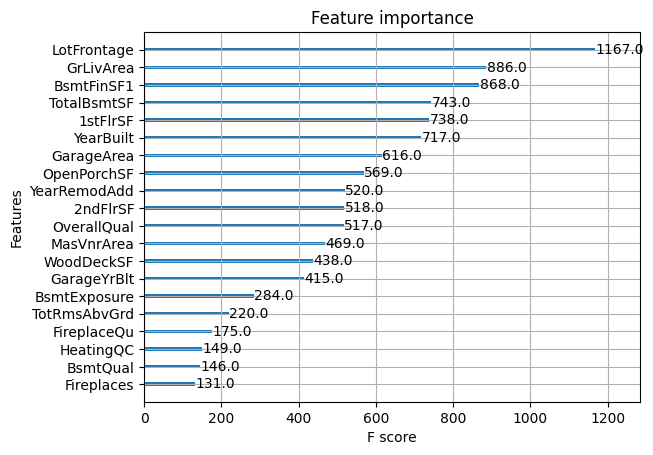

In [90]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,8))
plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.show()


In [94]:
# 2️⃣ Prepare data
X = df_selected.drop("SalePrice", axis=1)  # Features
y = df_selected["SalePrice"]               # Target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Initialize XGBoost regressor
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.6,
    colsample_bytree=0.8,
    random_state=42
)

# 4️⃣ Train model
xgb_model.fit(
    X_train, y_train,
    early_stopping_rounds=50,
    eval_set=[(X_test, y_test)],
    verbose=50
)

# 5️⃣ Predict and evaluate
y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse:.2f}")

[0]	validation_0-rmse:84786.09753
[50]	validation_0-rmse:33617.35668


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:28105.26388
[150]	validation_0-rmse:27063.98378
[200]	validation_0-rmse:26723.19543
[250]	validation_0-rmse:26488.85416
[299]	validation_0-rmse:26590.90523
RMSE on test set: 26437.22
